In [ ]:
!pip install soundfile

In [ ]:
!pip install tflearn

In [ ]:
!pip install tensorflow==1.14 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
pwd

'/content'

In [5]:
cd /content/drive/My Drive/speech_emotion/img

/content/drive/My Drive/speech_emotion/img


In [ ]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
  

IMG_SIZE = 150
LR = 1e-3

In [7]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [8]:
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/My Drive/speech_emotion/datasong/Actor_02"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  44


In [ ]:
for file in glob.glob('/content/drive/My Drive/speech_emotion/datasong/Actor_02/*.wav'):
  basename = os.path.basename(file)
  x, sr = librosa.load(file, sr=44100)
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()
  plt.savefig('/content/drive/My Drive/speech_emotion/dataimg2/image/Actor_02/' + basename + '.png')

In [58]:
x, sr = librosa.load('/content/drive/My Drive/speech_emotion/dataset/Actor_01/03-01-05-01-01-01-01.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(170691,) 44100


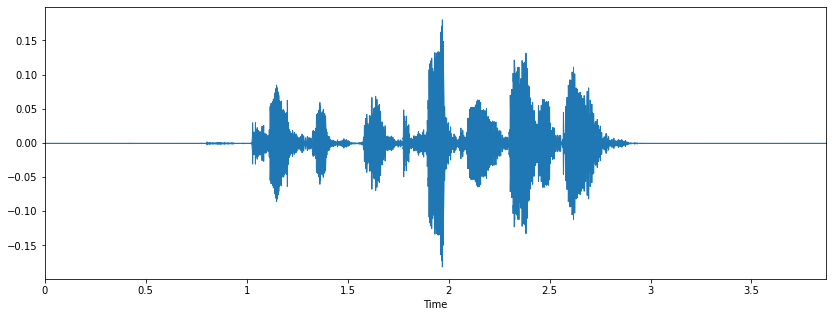

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

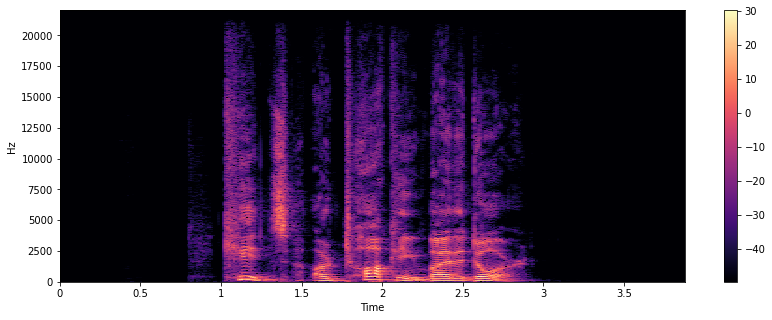

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

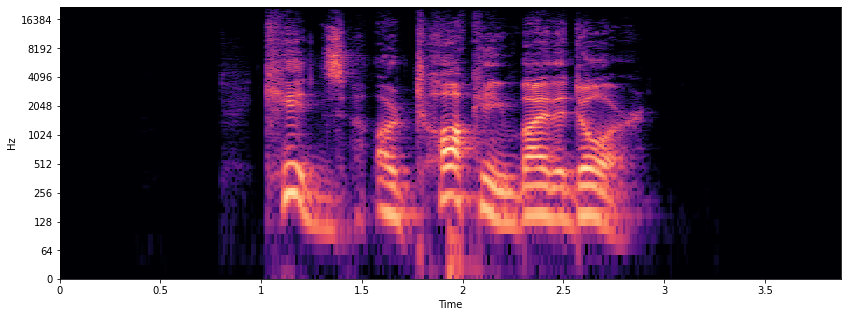

In [ ]:
st = '1234'
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.colorbar()
plt.savefig(st + 'sampleimg123.png')

In [11]:
import cv2 
for file in glob.glob('/content/drive/My Drive/speech_emotion/dataimg2/image/Actor_01/*.png'):
  basename = os.path.basename(file)
  img = cv2.imread(file,cv2.IMREAD_COLOR)
  img = img[45:316,127:750]
  img1 = cv2.resize(img, (150,150))
  filename = '/content/drive/My Drive/speech_emotion/dataimg2/img/Actor_01/' + basename + '.png'
  cv2.imwrite(filename, img1)